In [1]:
import pandas as pd
df = pd.read_csv('employment.csv')
df.head()


,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; In labor force:,Margin of Error; In labor force:,Estimate; In labor force: - Civilian labor force:,Margin of Error; In labor force: - Civilian labor force:,Estimate; In labor force: - Civilian labor force: - Employed,Margin of Error; In labor force: - Civilian labor force: - Empl,Estimate; In labor force: - Civilian labor force: - Unemployed,Margin of Error; In labor force: - Civilian labor force: - Unem,Estimate; In labor force: - Armed Forces,Margin of Error; In labor force: - Armed Forces,Estimate; Not in labor force,Margin of Error; Not in labor force
0,1,Allegheny Center,1,993.0,142.000000,614.0,131.000000,614.0,131.000000,579.0,131.000000,35.0,35.000000,0.0,10.000000,379.0,127.000000
1,2,Allegheny West,2,334.0,103.000000,230.0,79.000000,230.0,79.000000,221.0,80.000000,9.0,22.000000,0.0,10.000000,104.0,51.000000
2,3,Allentown,3,1922.0,343.995640,1085.0,180.540854,1085.0,180.540854,841.0,170.064694,244.0,114.498908,0.0,17.320508,837.0,221.167357
3,4,Arlington,4,1584.0,306.651268,1108.0,235.817726,1108.0,235.817726,991.0,207.465660,117.0,89.157165,0.0,17.320508,476.0,124.342270
4,5,Arlington Heights,5,211.0,106.000000,89.0,56.000000,89.0,56.000000,80.0,57.000000,9.0,14.000000,0.0,10.000000,122.0,99.000000


## Find averages of employment to unemployment and calculate best accordingly

Preview of data:


,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; In labor force:,Margin of Error; In labor force:,Estimate; In labor force: - Civilian labor force:,Margin of Error; In labor force: - Civilian labor force:,Estimate; In labor force: - Civilian labor force: - Employed,Margin of Error; In labor force: - Civilian labor force: - Empl,Estimate; In labor force: - Civilian labor force: - Unemployed,Margin of Error; In labor force: - Civilian labor force: - Unem,Estimate; In labor force: - Armed Forces,Margin of Error; In labor force: - Armed Forces,Estimate; Not in labor force,Margin of Error; Not in labor force
0,1,Allegheny Center,1,993.0,142.000000,614.0,131.000000,614.0,131.000000,579.0,131.000000,35.0,35.000000,0.0,10.000000,379.0,127.000000
1,2,Allegheny West,2,334.0,103.000000,230.0,79.000000,230.0,79.000000,221.0,80.000000,9.0,22.000000,0.0,10.000000,104.0,51.000000
2,3,Allentown,3,1922.0,343.995640,1085.0,180.540854,1085.0,180.540854,841.0,170.064694,244.0,114.498908,0.0,17.320508,837.0,221.167357
3,4,Arlington,4,1584.0,306.651268,1108.0,235.817726,1108.0,235.817726,991.0,207.465660,117.0,89.157165,0.0,17.320508,476.0,124.342270
4,5,Arlington Heights,5,211.0,106.000000,89.0,56.000000,89.0,56.000000,80.0,57.000000,9.0,14.000000,0.0,10.000000,122.0,99.000000



Average Employment-to-Unemployment Ratio across all neighborhoods: 12.97

Best Neighborhood by Employment-to-Unemployment Ratio:
Neighborhood                  Strip District
Employment_to_Unemployment             117.2
Name: 80, dtype: object


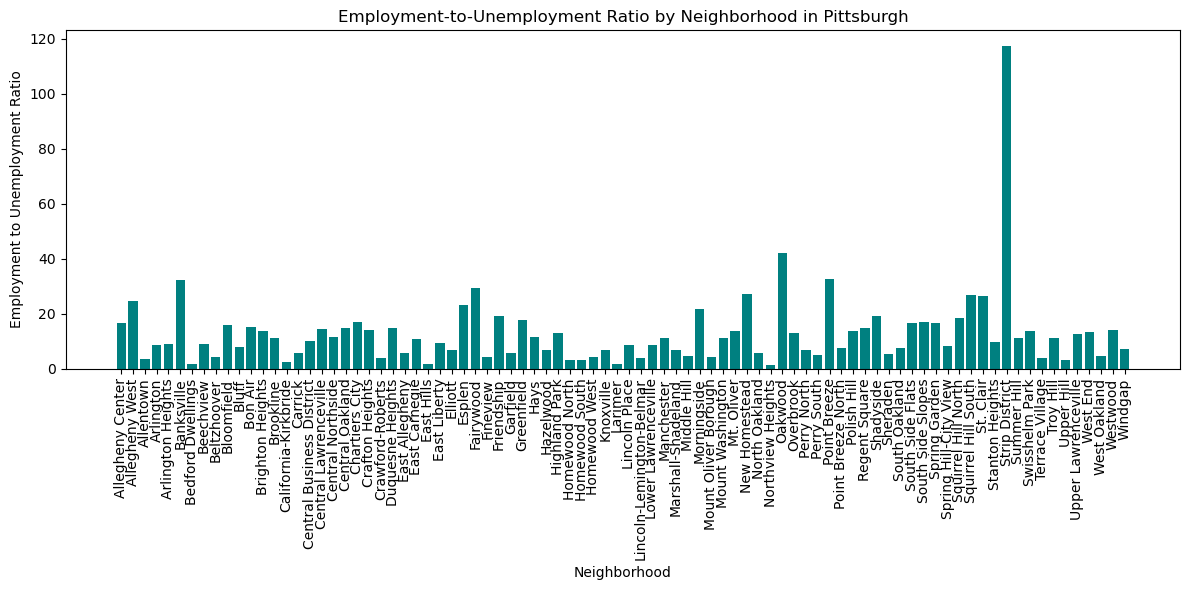

In [5]:
import pandas as pd
df = pd.read_csv('employment.csv')
print("Preview of data:")
display(df.head())
df = df.dropna(subset=['Estimate; In labor force: - Civilian labor force: - Unemployed'])
df = df[df['Estimate; In labor force: - Civilian labor force: - Unemployed'] != 0]
df['Employment_to_Unemployment'] = (
    df['Estimate; In labor force: - Civilian labor force: - Employed'] /
    df['Estimate; In labor force: - Civilian labor force: - Unemployed']
)
average_ratio = df['Employment_to_Unemployment'].mean()
print(f"\nAverage Employment-to-Unemployment Ratio across all neighborhoods: {average_ratio:.2f}")
best_neighborhood = df.loc[df['Employment_to_Unemployment'].idxmax(), ['Neighborhood', 'Employment_to_Unemployment']]
print("\nBest Neighborhood by Employment-to-Unemployment Ratio:")
print(best_neighborhood)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(df['Neighborhood'], df['Employment_to_Unemployment'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Employment to Unemployment Ratio')
plt.title('Employment-to-Unemployment Ratio by Neighborhood in Pittsburgh')
plt.tight_layout()
plt.show()

1. What metric did you calculate?
The Employment-to-Unemployment Ratio, which measures how many people are employed for every unemployed person in each Pittsburgh neighborhood.

2. Why is this metric meaningful?
It indicates economic stability and job availability. A higher ratio suggests that more residents are employed relative to those unemployed — a strong signal of local prosperity.

3. What was the average employment-to-unemployment ratio across all neighborhoods?
12.97 — meaning that, on average, there are roughly 13 employed individuals for every unemployed person in Pittsburgh’s neighborhoods.

4. Which neighborhood had the highest employment-to-unemployment ratio?
Strip District, with a ratio of 117.2.

5. Why is the Strip District considered the “best” neighborhood by this metric?
Because its employment-to-unemployment ratio far exceeds the citywide average, showing exceptionally strong economic engagement and low unemployment among residents.

6. How does this finding contribute to determining the “best neighborhood in Pittsburgh”?
By defining “best” in economic terms, the Strip District stands out as the most stable and opportunity-rich neighborhood, based on available labor force data.
